C:\Users\higas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


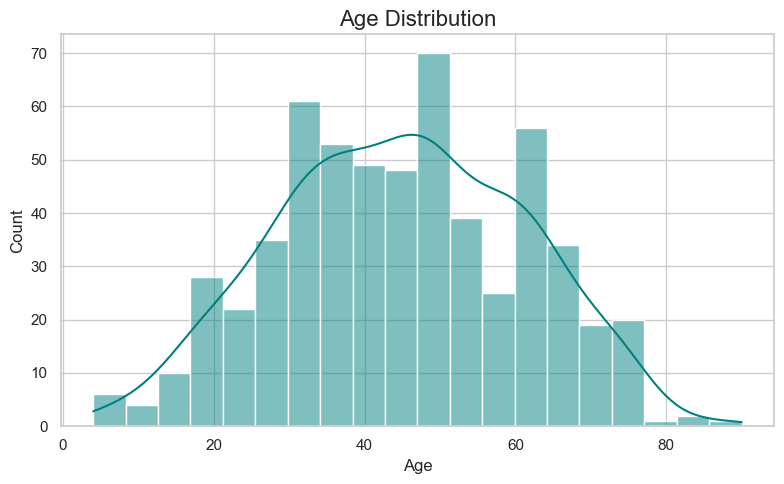

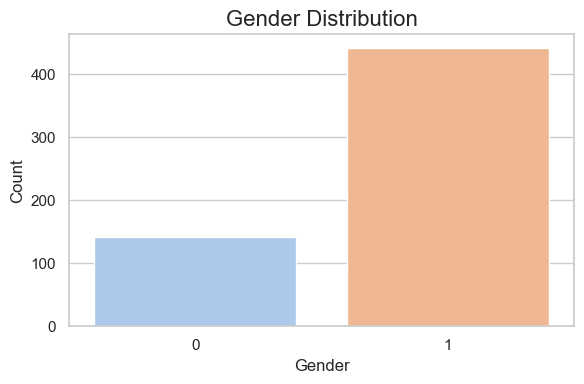

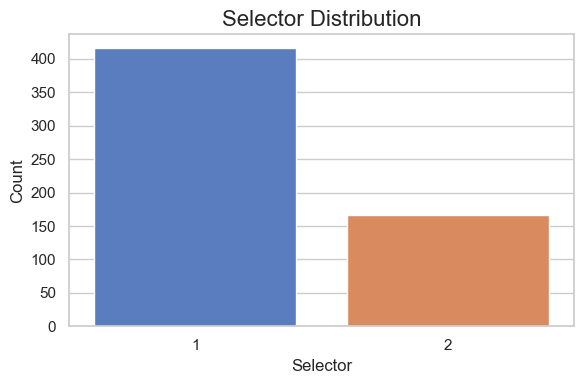

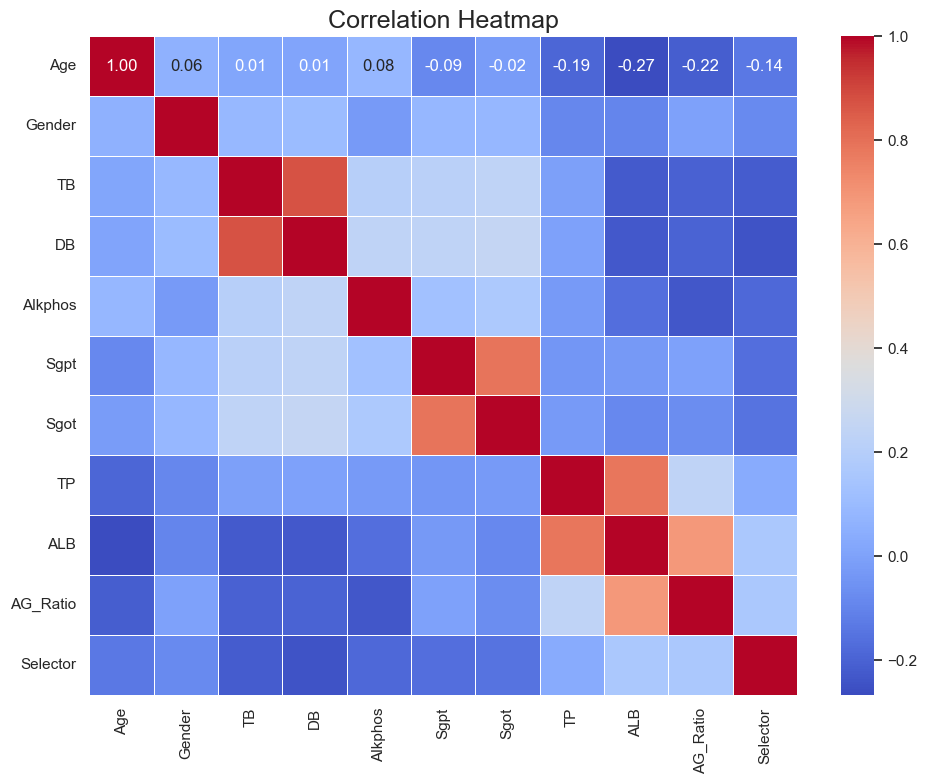

Top 5 features correlated with Selector: ['DB', 'TB', 'Alkphos', 'Sgpt', 'AG_Ratio']


C:\Users\higas\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\higas\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\higas\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\higas\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Logistic Regression: 0.7039
KNN: 0.6395
Naive Bayes: 0.5470
Decision Tree: 0.6352
Random Forest: 0.7016
MLP: 0.6847

Best performing classifier: Logistic Regression with accuracy 0.7039


C:\Users\higas\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [46]:
# ------------------------------
# Complete ILPD Analysis & Classification with Improved Visuals
# ------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# 1️⃣ Load CSV with proper headers
columns = ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AG_Ratio', 'Selector']
file_path = r"C:\Users\higas\Downloads\generative-ai-data-analysis-and-mining\Liver_Patient_Dataset_ILPD.csv"
df = pd.read_csv(file_path, names=columns, header=None)
df.columns = df.columns.str.strip()

# 2️⃣ Handle missing values
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Gender'] = df['Gender'].map({'Female':0, 'Male':1})

# 3️⃣ Improved Histograms & Visualizations
sns.set_theme(style="whitegrid")  # clean background

# Age Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color="teal")
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig(r"C:\Users\higas\Downloads\Age_Distribution.png")
plt.show()

# Gender Histogram
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig(r"C:\Users\higas\Downloads\Gender_Distribution.png")
plt.show()

# Selector Histogram
plt.figure(figsize=(6,4))
sns.countplot(x='Selector', data=df, palette='muted')
plt.title('Selector Distribution', fontsize=16)
plt.xlabel('Selector', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig(r"C:\Users\higas\Downloads\Selector_Distribution.png")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap', fontsize=18)
plt.tight_layout()
plt.savefig(r"C:\Users\higas\Downloads\Correlation_Heatmap.png")
plt.show()

# 4️⃣ Top 5 features correlated with 'Selector'
corr_selector = df.corr()['Selector'].abs().sort_values(ascending=False)
top5_features = corr_selector.index[1:6]  # exclude 'Selector' itself
print("Top 5 features correlated with Selector:", top5_features.tolist())

# 5️⃣ Standard scaling
features = df.drop('Selector', axis=1)
labels = df['Selector']
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 6️⃣ Train-test split & classifier comparison
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "MLP": MLPClassifier(max_iter=1000)
}

results = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    results[name] = scores.mean()

# Print classifier accuracies
for clf_name, score in results.items():
    print(f"{clf_name}: {score:.4f}")

best_clf = max(results, key=results.get)
print(f"\nBest performing classifier: {best_clf} with accuracy {results[best_clf]:.4f}")
